In [1]:
from os.path import join, sep
from scipy.spatial.distance import squareform
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

MODEL = '2.02'
# MODEL = '2.01'

tf_idf_path = join('C:', sep, 'Users', 'ssarusi', 'Desktop', 'second_degree', 'semester_d', 'NLP', 'tf_idf', MODEL)
scores_path = join('C:', sep, 'Users', 'ssarusi', 'Desktop', 'second_degree', 'semester_d', 'NLP', 'scores', MODEL)
dis_path = join('C:', sep, 'Users', 'ssarusi', 'Desktop', 'second_degree', 'semester_d', 'NLP', 'distances', MODEL)
fig_path = join('C:', sep, 'Users', 'ssarusi', 'Desktop', 'second_degree', 'semester_d', 'NLP', 'figures', MODEL)

In [2]:
def load_dis_matrices(n_m1, n_m2, method, d_path):
    name_1 = n_m1 + '_' + method + '_' + n_m2
    name_2 = n_m2 + '_' + method + '_' + n_m1
    print(f"load {name_1}")
    with open(join(d_path, name_1 + '.pickle'), 'rb') as handle:
        dis_1 = pickle.load(handle)
    print(f"load {name_2}")
    with open(join(d_path, name_2 + '.pickle'), 'rb') as handle:
        dis_2 = pickle.load(handle)
    #dis_1= dis_1[:120]
    #dis_2= dis_2[:120] 
    return squareform(dis_1), squareform(dis_2)

In [33]:
def generate_heatmaps(n_m1, n_m2, method, d_path, f_path):
    DPI = 100
    
    dis_1, dis_2 = load_dis_matrices(n_m1, n_m2, method, d_path)
    print(type(dis_1))

    title = "Distances between " + method + " words"
    dis = [dis_1, dis_2]
    t1 = n_m1.replace(r"_model_.*","")
    t2 = n_m2.replace("_model_2.01.model","")
    community = [t1, t2]

    cols=2
    fig ,ax = plt.subplots(ncols=cols, figsize=(24, 12))
    fig.suptitle(title, fontsize=30)
    for j in range(cols):   
        ax[j].set_title(community[j], fontsize=30)
        ax[j].get_xaxis().set_visible(False)
        ax[j].get_yaxis().set_visible(False)
        mask = np.zeros_like(dis[j])
        mask[np.triu_indices_from(mask)] = True
#         if j == 0:
#             sns.heatmap(dis[j], mask=mask, annot=False, cmap="Blues", square=True, ax=ax[j], vmin=-1, vmax=1, cbar= False,
#                         cbar_ax=None)
#         else:
        curr_ax = sns.heatmap(dis[j], mask=mask, annot=False, cmap="Blues", square=True, ax=ax[j], vmin=-1, vmax=1)
        cbar = curr_ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=20)
        if j == 1:
            cbar.ax.set_visible(False)

#     fig.savefig(join(f_path, t1 + t2 + '_' + method + '.png'), bbox_inches="tight", dpi=DPI)

    plt.show()

# PREV

### score = 0.01

load usanews_model_2.02.model_intersection_worldevents_model_2.02.model
load worldevents_model_2.02.model_intersection_usanews_model_2.02.model
<class 'numpy.ndarray'>


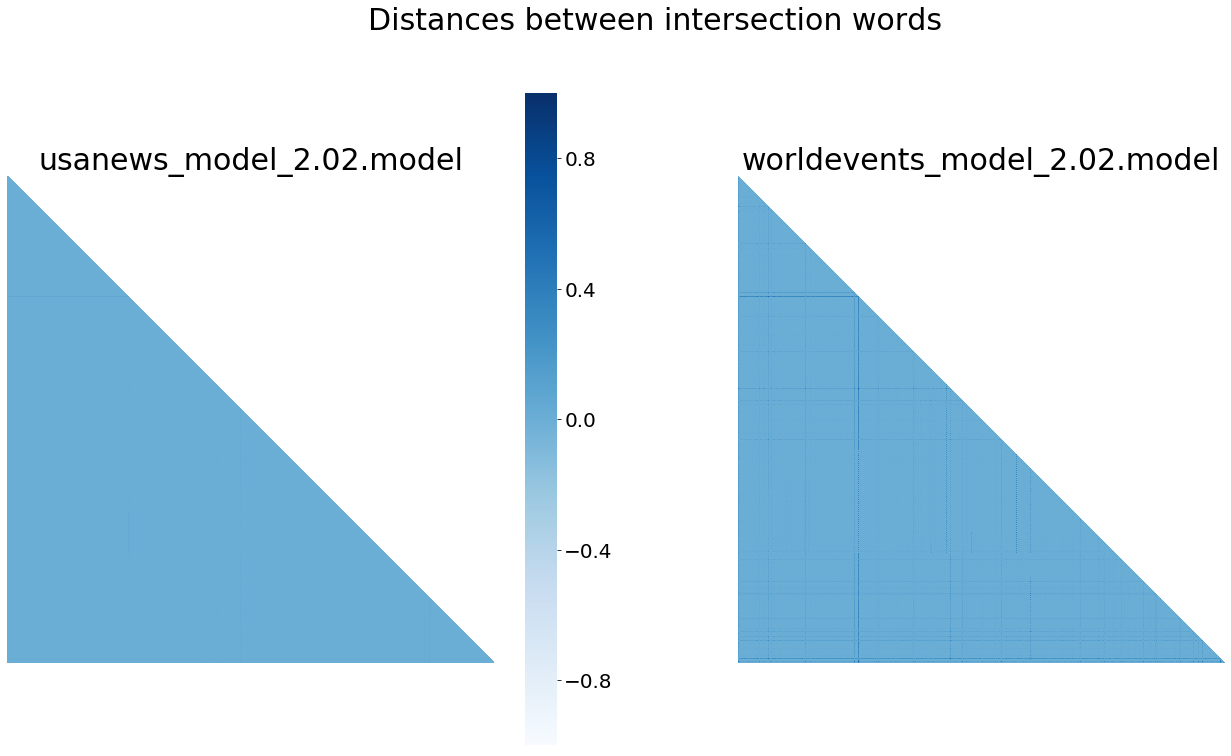

In [34]:
# method_='union'
method_='intersection'
generate_heatmaps('usanews_model_2.02.model', 'worldevents_model_2.02.model', method_, dis_path, fig_path, )

### score = 0.57

load usanews_model_2.02.model_intersection_shacomains_model_2.02.model
load shacomains_model_2.02.model_intersection_usanews_model_2.02.model
<class 'numpy.ndarray'>


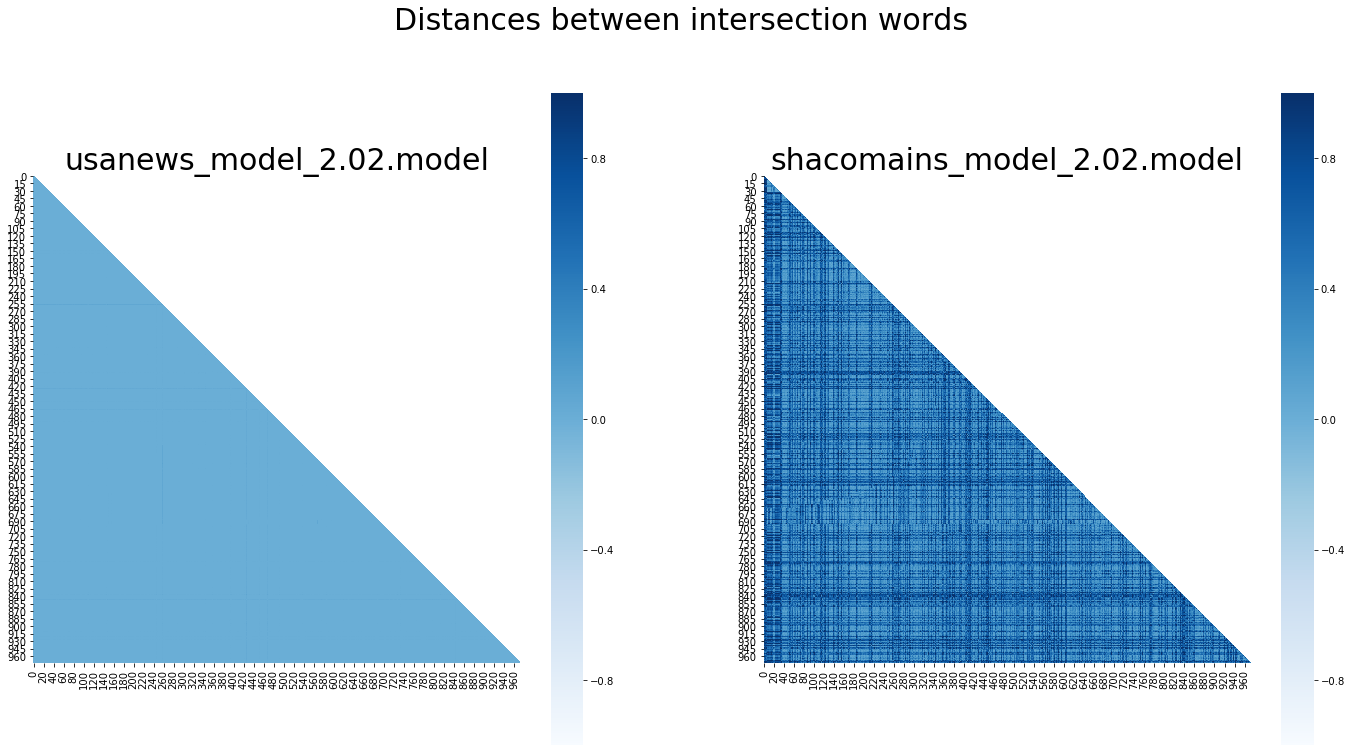

In [24]:
# method_='union'
method_='intersection'
generate_heatmaps('usanews_model_2.02.model', 'shacomains_model_2.02.model', method_, dis_path, fig_path, )

### score = 0.99

load usanews_model_2.02.model_intersection_buildapcforme_model_2.02.model
load buildapcforme_model_2.02.model_intersection_usanews_model_2.02.model
<class 'numpy.ndarray'>


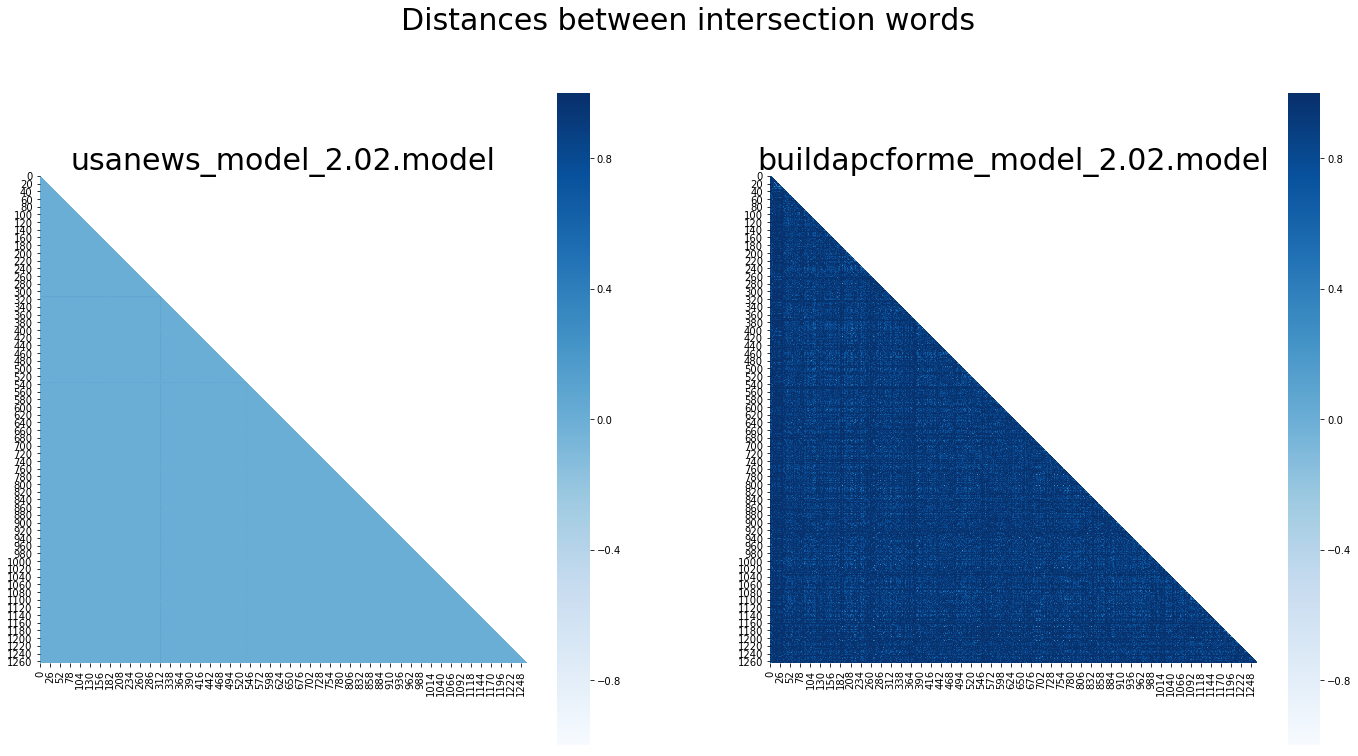

In [19]:
# method_='union'
method_='intersection'
generate_heatmaps('usanews_model_2.02.model', 'buildapcforme_model_2.02.model', method_, dis_path, fig_path, )